In [1]:
import tensorflow as tf
import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.3


In [3]:
import numpy as np
x = np.array(12)
print(x.ndim)

0


In [4]:
x.shape

()

In [5]:
x = np.array([10,20,30,40,50])
print(x.ndim)
x.shape

1


(5,)

### 행렬 (2D 텐서)

* 벡터의 배열을 행렬(matrix) 또는 2D텐서라고 한다.

In [7]:
x = np.array( [ [11,21,31],
                [12,22,32],
                [13,23,33]
              ])
print(x.ndim)
x.shape

2


(3, 3)

In [8]:
x = np.array([
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ]
             ])
print(x.ndim)
x

3


array([[[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]],

       [[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]],

       [[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]]])

In [9]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
print(train_images.ndim)
print(train_images.shape)

3
(60000, 28, 28)


### 이미지 출력해 보기

In [14]:
import matplotlib.pyplot as plt

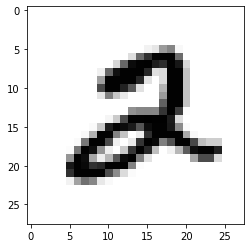

In [16]:
image = train_images[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

### 넘파이를 활용한 텐서 조작

In [17]:
my_slice = train_images[10:50]
print(my_slice.shape)

(40, 28, 28)


In [18]:
my_slice = train_images[10:50, :, :]
print(my_slice.shape)

(40, 28, 28)


In [19]:
my_slice = train_images[: , 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


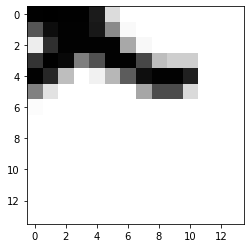

In [20]:
image = my_slice[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

(20, 21)


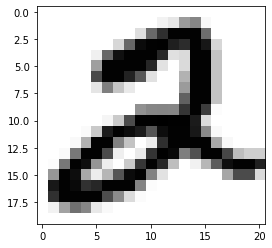

In [21]:
my_slice = train_images[5, 4:24, 4:25]
print(my_slice.shape)

plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

### 06 배치 데이터 

In [22]:
### 딥러닝 모델에서는 한번 전체 데이타를 처리하지 않고, 
### 그대신 데이터를 작은 배치(batch)로 나눈다.
batch = train_images[ : 128]
next_batch = train_images[128:256]

In [23]:
# (60000, 28, 28)  색이 없었던 것.
# (60000, 28, 28, 3)  RGB 색이 있어요.
# 2D : 행렬(타이타닉, 바이크)..
# 3D : 시계열 데이터 
# 4D : (샘플개수, 높이, 너비, 채널) 채널1:흑백, 채널3(RGB):3
# 5D : 동영상 (샘플개수, 프레임, 높이, 너비, 채널)

### 텐서의 크기 변환

In [24]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
train_images = train_images.reshape((60000, 28*28))  # 3D -> 2D
print( train_images.ndim)
print( train_images.shape)

2
(60000, 784)


### 라이브러리 불러오기

In [28]:
import keras
import pandas as pd
import numpy as np

In [30]:
## parse_dates : datetime 컬럼을 시간형으로 불러올 수 있음
train = pd.read_csv("bike_mod_tr.csv", parse_dates=['datetime'])
test = pd.read_csv("bike_mod_test.csv", parse_dates=['datetime'])

### 데이터 선택

In [47]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [62]:
# input_col = ['hour', 'temp']
input_col = ['hour', 'temp', 'dayofweek', 'workingday', 'season', 'weather']
labeled_col = ['count']

In [63]:
X = train[input_col]    
y = train[labeled_col]
X_val = test[input_col]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)
print(X_train.shape)

(8164, 6)


In [66]:
### 난수 발생 패턴 결정 0
seed = 0
np.random.seed(seed)

### 딥러닝 구조 결정
 * 사용하는 피처(2개) - 입력층의 노드는 2개
 * 마지막 예측하는 것이 회귀 - 출력층의 노드는 1개
 * 마지막 예측하는 것이 분류(다항) - 출력층의 노드는 범주의 개수만큼 생긴다.

* Sequential() 함수를 사용하여 한층 한층 쉽게 쌓아올릴 수 있다.
* model.add()로 한층 또는 두층씩 추가
* 첫 model.add() 입력층과 그 다음 출력층을 넣을 수 있다.
* 각 은닉층이 끝나는 시점에 활성화 함수를 통해 비선형 문제를 풀 수 있게 된다.

In [67]:
from keras.models import Sequential
from keras.layers import Dense

In [68]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


### 배치 데이터 10개
 * (10,2) -> 

### 평가지표
 * MSE, RMSE, RMLSE(or RMSLE), MAE
 * MSE로 평가한다면 loss='mean_squared_error'
 * optimizer-가중치를 업데이트 시켜가는데, 사용하는 알고리즘.(cs231n)

In [75]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
817/817 [==============================] - 1s 1ms/step - loss: 15036.1953
Epoch 2/200
817/817 [==============================] - 1s 1ms/step - loss: 14937.3691
Epoch 3/200
817/817 [==============================] - 1s 1ms/step - loss: 14856.6348
Epoch 4/200
817/817 [==============================] - 1s 1ms/step - loss: 14739.6611
Epoch 5/200
817/817 [==============================] - 1s 1ms/step - loss: 14663.1445
Epoch 6/200
817/817 [==============================] - 1s 1ms/step - loss: 14571.4229
Epoch 7/200
817/817 [==============================] - 1s 1ms/step - loss: 14495.7021
Epoch 8/200
817/817 [==============================] - 1s 1ms/step - loss: 14325.9932
Epoch 9/200
817/817 [==============================] - 1s 1ms/step - loss: 14220.7402
Epoch 10/200
817/817 [==============================] - 1s 1ms/step - loss: 14141.6484
Epoch 11/200
817/817 [==============================] - 1s 1ms/step - loss: 14061.8057
Epoch 12/200
817/817 [==============================

817/817 [==============================] - 1s 1ms/step - loss: 8674.9824
Epoch 96/200
817/817 [==============================] - 1s 1ms/step - loss: 8690.7705
Epoch 97/200
817/817 [==============================] - 1s 1ms/step - loss: 8637.1416
Epoch 98/200
817/817 [==============================] - 1s 1ms/step - loss: 8580.1816
Epoch 99/200
817/817 [==============================] - 1s 1ms/step - loss: 8625.1172
Epoch 100/200
817/817 [==============================] - 1s 1ms/step - loss: 8602.9199
Epoch 101/200
817/817 [==============================] - 1s 1ms/step - loss: 8514.3730
Epoch 102/200
817/817 [==============================] - 1s 2ms/step - loss: 8589.2842
Epoch 103/200
817/817 [==============================] - 1s 2ms/step - loss: 8533.1738
Epoch 104/200
817/817 [==============================] - 1s 1ms/step - loss: 8477.9766
Epoch 105/200
817/817 [==============================] - 1s 1ms/step - loss: 8503.5000
Epoch 106/200
817/817 [==============================] - 1s 1

817/817 [==============================] - 1s 1ms/step - loss: 7346.8013
Epoch 190/200
817/817 [==============================] - 1s 1ms/step - loss: 7299.0562
Epoch 191/200
817/817 [==============================] - 1s 1ms/step - loss: 7377.2148
Epoch 192/200
817/817 [==============================] - 1s 1ms/step - loss: 7407.3188
Epoch 193/200
817/817 [==============================] - 1s 1ms/step - loss: 7331.2188
Epoch 194/200
817/817 [==============================] - 1s 1ms/step - loss: 7551.9858
Epoch 195/200
817/817 [==============================] - 1s 1ms/step - loss: 7312.9951
Epoch 196/200
817/817 [==============================] - 1s 1ms/step - loss: 7385.1045
Epoch 197/200
817/817 [==============================] - 1s 1ms/step - loss: 7246.3340
Epoch 198/200
817/817 [==============================] - 1s 1ms/step - loss: 7263.4116
Epoch 199/200
817/817 [==============================] - 1s 1ms/step - loss: 7345.4014
Epoch 200/200
817/817 [==============================] - 

### 평가 확인

In [76]:
model.evaluate(X_test, y_test)

86/86 [==============================] - 0s 983us/step - loss: 7172.0405


7172.04052734375

In [77]:
pred = model.predict(X_val)
sub = pd.read_csv("sampleSubmission.csv")

In [78]:
sub['count'] = pred
sub.loc[sub['count']<0, 'count'] = 0

In [79]:
sub.to_csv("nn_sub_1109_02.csv", index=False)

### 실습 4-1
 * 변수를 추가를 통해 성능을 향상시켜보자(5-10분)

### 타이타닉 데이터 셋

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import tensorflow as tf

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [83]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
print(train.shape, test.shape)

(891, 12) (418, 11)


In [85]:
### 피처 선택(3개) - 입력층 노드 3개

In [86]:
input_col = ['Pclass', 'SibSp', 'Parch']
labeled_col = ['Survived']

In [87]:
X = train[ input_col ]
y = train[ labeled_col ]
X_val = test[ input_col ]

### 데이터 나누기

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                random_state=0)

In [89]:
print(X_train.shape, X_test.shape)
print()
print(y_train.shape, y_test.shape)

(668, 3) (223, 3)

(668, 1) (223, 1)


In [92]:
from keras.models import Sequential
from keras.layers import Dense

In [94]:
model = Sequential()
model.add(Dense(15, input_dim=3, activation='relu'))
model.add(Dense(10, activation='relu') )
model.add(Dense(1, activation='sigmoid'))

In [95]:
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
67/67 [==============================] - 0s 1ms/step - loss: 0.9197 - accuracy: 0.3862
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.7611 - accuracy: 0.3578
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.5090
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5973
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6078
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6123
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6108
Epoch 8/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6123
Epoch 9/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6153
Epoch 10/100
67/67 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6123
Epoch 11/

Epoch 82/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7036
Epoch 83/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.6976
Epoch 84/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7006
Epoch 85/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7036
Epoch 86/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7051
Epoch 87/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.7036
Epoch 88/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.6976
Epoch 89/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7051
Epoch 90/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7096
Epoch 91/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7021


In [96]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 997us/step - loss: 0.5759 - accuracy: 0.7309


[0.5759212970733643, 0.7309417128562927]

In [97]:
pred = model.predict(X_val)

In [98]:
sub = pd.read_csv("./titanic/gender_submission.csv")
sub.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [99]:
sub['Survived'] = pred[:, 0] > 0.5  # True, False

In [102]:
sub.loc[sub['Survived']==True, 'Survived'] = 1
sub.loc[sub['Survived']==False, 'Survived'] = 0

In [103]:
sub.to_csv("titanic_submit1109.csv", index=False)

### 0.69138